# Salut

In [25]:
pip install pandas numpy matplotlib seaborn openpyxl lxml

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import os
import openpyxl
import lxml
from IPython.display import display

In [27]:
csv_files = [f for f in os.listdir('data') if f.endswith('.xlsx')]
csv_files

['airports.xlsx', 'flights.xlsx', 'planes.xlsx']

In [53]:
flights = pd.read_excel('./data/flights.xlsx')
flights.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2021,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2021-01-01T05:00:00Z
1,2021,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2021-01-01T05:00:00Z
2,2021,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2021-01-01T05:00:00Z
3,2021,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2021-01-01T05:00:00Z
4,2021,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2021-01-01T06:00:00Z


## Question1

1.	Combien y-a-t-il : 

-	d’aéroports en tout, de départ et de destination
-	Combien y-a-t-il d’aéroports où on ne passe pas à l’heure d’été (indice : colonne dst : 23) ? de fuseaux horaires (10 voir colone tzone dont une  « N »)
-	de compagnies, d’avions, de vols annulés ? 



In [29]:
with open('./data/airlines.json') as json_file:
    airlines = pd.read_json('./data/airlines.json')

airlines.to_csv('./data/airlines.csv', index=False)

airlines

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [39]:
airports = pd.read_excel('./data/airports.xlsx')

no_dst = airports['dst'].value_counts()['N']

airports


,Unnamed: 0,faa,name,lat,lon,alt,tz,dst,tzone
0,0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
...,...,...,...,...,...,...,...,...,...
1453,1453,ZUN,Black Rock,35.083228,-108.791778,6454,-7,A,America/Denver
1454,1454,ZVE,New Haven Rail Station,41.298669,-72.925992,7,-5,A,America/New_York
1455,1455,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0,-5,A,America/New_York
1456,1456,ZWU,Washington Union Station,38.897460,-77.006430,76,-5,A,America/New_York


In [40]:
print(f'Il y a {airports['name'].count()} aéroports en tout.')

Il y a 1458 aéroports en tout.


In [80]:
#aéroports de départs et destinations
 
departures = flights['origin'].nunique()

print(f'Il y a {departures} aéroports de départ.')

print()

destinations = flights['dest'].nunique()

print(f'Il y a {destinations} aéroports d\'arrivés.')


Il y a 3 aéroports de départ.

Il y a 103 aéroports d'arrivés.


In [31]:
print(f'Il y a {no_dst} aéroports où on ne passe pas en heure d\'été.')
airports.head(25)

Il y a 23 aéroports où on ne passe pas en heure d'été.


,Unnamed: 0,faa,name,lat,lon,alt,tz,dst,tzone
0,0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
5,5,0A9,Elizabethton Municipal Airport,36.371222,-82.173417,1593,-5,A,America/New_York
6,6,0G6,Williams County Airport,41.467306,-84.506778,730,-5,A,America/New_York
7,7,0G7,Finger Lakes Regional Airport,42.883565,-76.781232,492,-5,A,America/New_York
8,8,0P2,Shoestring Aviation Airfield,39.794824,-76.647191,1000,-5,U,America/New_York
9,9,0S9,Jefferson County Intl,48.053809,-122.810644,108,-8,A,America/Los_Angeles


In [91]:
#fuseaux horaires différents

fuseaux = airports['tzone'].nunique()

print(f'Il y a {fuseaux} fuseaux horaires différents.')


Il y a 10 fuseaux horaires différents.


In [32]:
companies = airlines.count()['name']

print(f'Il y a {companies} compagnies.')

Il y a 16 compagnies.


In [33]:
planes = pd.read_excel('./data/planes.xlsx')

planes

,Unnamed: 0,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...,...
3317,3317,N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3318,3318,N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan
3319,3319,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3320,3320,N998DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,NaN,Turbo-jet


In [35]:
print(f'Il y a {planes.shape[0]} avions.')

Il y a 3322 avions.


In [103]:
flights.loc[flights['arr_time'] == 0]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour


# Question 2

2.	Quel est l’aéroport de départ le plus emprunté ? Quelles sont les 10 destinations les plus (moins) prisées (en indiquant le nom complet des destinations et non juste le code correspondant et le % corresp pour chaque destination) ? Quelle sont les 10 avions qui ont le plus (moins) décollé ?

In [41]:
#l'aeroprot de depart le plus emprunte

comptage_depart_aeroports = flights['origin'].value_counts()
aeroport_plus_emprunte = comptage_depart_aeroports.idxmax()
nb_vols_plus_emprunte = comptage_depart_aeroports.max()

print(f"L'aéroport de départ le plus emprunté est {aeroport_plus_emprunte} avec {nb_vols_plus_emprunte} vols.")


L'aéroport de départ le plus emprunté est EWR avec 91241 vols.


In [102]:
# Les 10 destinations les plus et moins prisées
comptage_arrivees_aeroports = flights['dest'].value_counts()
destinations = comptage_arrivees_aeroports.reset_index().merge(flights, left_on='index', right_on='faa')
total_vols = comptage_arrivees_aeroports.sum()
destinations['pourcentage'] = (destinations['dest'] / total_vols) * 100

top_10_destinations = destinations.head(10)
bottom_10_destinations = destinations.tail(10)

print("Les 10 destinations les plus prisées :")
print(top_10_destinations[['name', 'pourcentage']])

print("\nLes 10 destinations les moins prisées :")
print(bottom_10_destinations[['name', 'pourcentage']])

KeyError: 'faa'

# Question 3

3.	Combien chaque compagnie a desservi de destination ; combien chaque compagnie a desservie de destination par aéroport d’origine. Réaliser les graphiques adéquats qui synthétisent ces informations ? 

C:\Users\Swerk\AppData\Local\Temp\ipykernel_40060\376204169.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df.index, y=df.values, palette="viridis")


Text(0, 0.5, 'Nombre de vols')

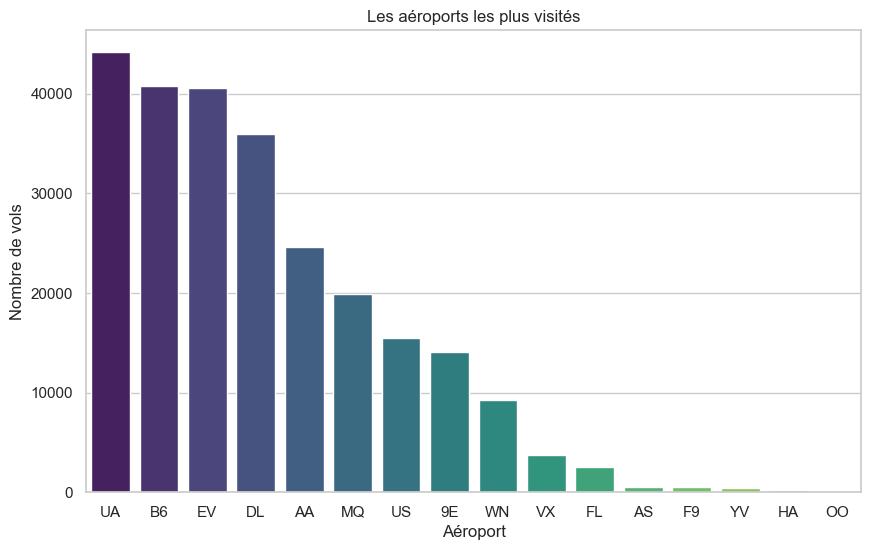

In [113]:
# flights dest et count 
df = pd.DataFrame(flights)

df = df.groupby('carrier')['dest'].count()
df = df.sort_values(ascending=False)

# TODO : Ajouter un titre et des labels au lieu des prefix

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df.index, y=df.values, palette="viridis")
plt.title('Les aéroports les plus visités')
plt.xlabel('Aéroport')
plt.ylabel('Nombre de vols')

# Question 4
4.	Trouver tous les vols ayant atterri à Houston (IAH ou HOU) ? Combien de vols partent de NYC airports vers Seattle, combien de compagnies desservent cette destination et combien d’avions “uniques” ? 

In [166]:
# Nombre de vols ayant atteri à Houston
flights_at_houston = flights[flights['dest'] == 'IAH'].count() + flights[flights['dest'] == 'HOU'].count()
flights_at_houston = flights_at_houston['carrier']

print(f'Il y a {flights_at_houston} vols à destination de Houston.')

# Nombres vols NYC -> SEA
flights_nyc_to_sea = flights[(flights['origin'] == 'NYC') & (flights['dest'] == 'SEA')].count()
flights_nyc_to_sea = flights_nyc_to_sea['carrier']

print(f'Il y a {flights_nyc_to_sea} vols de New York à Seattle.')

# Nombre de compagnies desservant Seattle
companies_to_sea = flights[flights['dest'] == 'SEA']['carrier'].nunique()

print(f'Il y a {companies_to_sea} compagnies qui desservent Seattle.')

# Nombre d'avions desservant Seattle
unique_planes = flights[flights['dest'] == 'SEA']['tailnum'].nunique()

print(f'Il y a {unique_planes} avions différents qui desservent Seattle.')


Il y a 6958 vols à destination de Houston.
Il y a 1434 vols de New York à Seattle.
Il y a 5 compagnies qui desservent Seattle.
Il y a 857 avions différents qui desservent Seattle.


# Question 5

5.	Trouver le nombre de vols par destination ? Trier les vols suivant la destination, l’aéroport d’origine, la compagnie dans un ordre alphabétique croissant (en réalisant les jointures nécessaires pour obtenir les noms explicites des aéroports) ?

In [101]:
vols = flights[['dest', 'origin', 'carrier']]
nb_vol_dest = vols.groupby('dest').size().reset_index(name='nombre_de_vols').rename(columns={'dest': 'code_aeroport'})

print(nb_vol_dest)

print("=====================================")

sorted_vols = vols.sort_values(['dest', 'origin', 'carrier'], ascending=[False, False, True])

print(sorted_vols)


    code_aeroport  nombre_de_vols
0             ABQ             164
1             ACK              92
2             ALB             386
3             ATL           12946
4             AUS            1826
..            ...             ...
98            TPA            5682
99            TUL             239
100           TVC              16
101           TYS             481
102           XNA             782

[103 rows x 2 columns]
       dest origin carrier
225252  XNA    LGA      EV
59      XNA    LGA      MQ
471     XNA    LGA      MQ
615     XNA    LGA      MQ
927     XNA    LGA      MQ
...     ...    ...     ...
248518  ABQ    JFK      B6
249454  ABQ    JFK      B6
250236  ABQ    JFK      B6
251219  ABQ    JFK      B6
252259  ABQ    JFK      B6

[252704 rows x 3 columns]


# Question 6
6.	Quelles sont les compagnies qui n'opèrent pas sur tous les aéroports d’origine ? Quelles sont les compagnies qui desservent l’ensemble de destinations ?
Faire un tableau où l’on récupère l’ensemble des origines et des destinations pour l’ensemble des compagnies. 

# Question 7
7.	Quelles sont les destinations qui sont exclusives à certaines compagnies ? 

# Question 8
8.	Filtrer le vol pour trouver ceux exploités par United, American ou Delta ?